PythonHW3_YOURPERMNUMBER# Python Homework 3

**Due date:** Friday, __November 5th__, 11:59 p.m. via GradeScope

**Instruction:** Please upload your html file on GauchoSpace with filename "PythonHW3_YOURPERMNUMBER".

__Background:__ The purpose of this python homework is to explore some path properties of the simple symmetric random walk.

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, and a positive integer $N$, we define the following related random variables:

* The time of the **last** visit to $0$ before time $2N$: 

$$L_{2N} = \max \{ 0 \leq n \leq  2N : S_n = 0 \}.$$

* The time when the random walk **reaches its maximum** value between time $0$ and $2N$: 

$$M_{2N} = \operatorname{argmax} \{ S_n : 0 \leq n \leq 2N \}.$$

Note that both $L_{2N}$ and $M_{2N}$ are discrete random variables taking values between $0$ and $2N$.

Our goal is to explore the **distribution** of $L_{2N}$ and $M_{2N}$. Throughout we will use $N=250$ for illustration.

As usual, we start with loading some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine

## Problem 1 (2 Points)

1. Write a function <tt>randomWalk(...)</tt> which simulates one <i>path</i> (or <i>trajectory</i>) of a simple symmetric random walk with 2N time steps (i.e. from 0,1,2,...,2N) starting at $S_0=0$.

Input: 
* <tt>lengthOfRandomWalk = 2N</tt> 

Output:
* <tt>samplePath</tt>: Array of length 2N+1 with the entire path of the random walk on 0,1,2,...,2N


In [2]:
def randomWalk(lengthOfRandomWalk):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE np.random.choice() TO SIMULATE THE INCREMENTS of +/-1
    step = [-1,1]
    samplePath = []
    samplePath.append(0)
    for i in range(2*int(lengthOfRandomWalk)):
        samplePath.append(int(samplePath[int(i)])+int(np.random.choice(step,1)))
        
    return samplePath

In [3]:
## TEST YOUR FUNCTION HERE
print(randomWalk(50))

[0, 1, 0, 1, 0, 1, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 11, 12, 13, 12, 11, 12, 13, 14, 15, 16, 15, 14, 15, 16, 15, 14, 13, 12, 11, 12, 13, 12, 13, 14, 13, 12, 13, 14, 13, 12, 11, 10, 9, 8, 7, 6, 7, 6, 7, 8, 9, 10, 9, 8, 7, 8, 9, 10, 9, 8, 7, 8, 7, 8, 9, 10, 11, 12, 13, 12, 13, 12, 11, 12, 11, 12, 11, 12, 11, 10, 11, 12]


2. Plot the trajectory of the random walk you simulated in 1.)

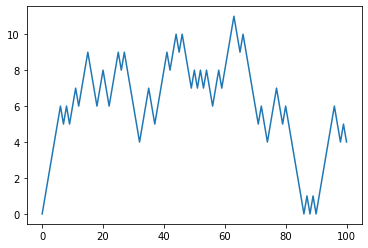

In [4]:
## WRITE YOUR OWN CODE HERE
plt.plot(randomWalk(50))

## Problem 2 (4 points)

Write a function which takes a path (= realization) of the random walk as an input and then evaluates the value of $L_{2N}$ defined above on that path.

__1. Function:__ <tt>TimeOfLastVisitOfZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt>  (Array of length $2N+1$)

Output:
* <tt>result</tt>: Realization of the random variable $L_{2N}$ (scalar)

In [5]:
def TimeOfLastVisitOfZero(path):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.where() AND numpy.amax()
    path = np.array(path)
    result = np.where(path == 0)
    lastVisit = np.amax(result)
        
    return lastVisit  

In [6]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
TimeOfLastVisitOfZero(path)

[0, -1, -2, -3, -4, -3, -2, -1, -2, -1, -2, -3, -2, -3, -4, -5, -4, -3, -4, -5, -6, -5, -6, -5, -6, -5, -4, -5, -4, -3, -4, -5, -6, -7, -6, -5, -6, -7, -8, -9, -10]


0

__2.__ Write a function <tt>sampleLastVisit</tt> that samples $M$ paths of the random walk, runs TimeOfLastVisitOfZero on each of them and returns an Array of length M of the resulting empirical distribution of $L_{2N}$.

It turns out that in fact one can in fact **analytically** find the limiting distribution of $L_{2N}$ in the limit $N \to \infty$. This is given  by the arcsine distribution and looks like this (below you should get the same *shape*, but different x- and y-axis scaling).

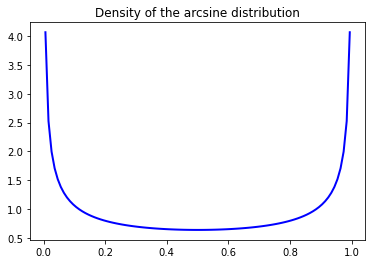

In [7]:
## A PLOT OF THE ARCSINE DENSITY
x = np.linspace(arcsine.ppf(0.05), arcsine.ppf(0.95), 100)
plt.title("Density of the arcsine distribution")
plt.plot(x, arcsine.pdf(x), linewidth=2, color='b')
plt.show()

In [8]:
def sampleLastVisit(N,M):
    
    LastVisit = []
    LastVisit.append(0)
    for i in range(M):
        LastVisit.append(TimeOfLastVisitOfZero(randomWalk(N)))
        
    return LastVisit

Run your <tt>sampleLastVisit</tt> function with N=250 and $M=10,000$ paths and plot the histogram of $L_{2N}$.

No handles with labels found to put in legend.


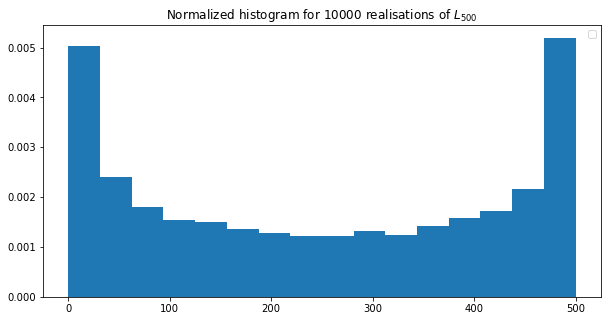

In [9]:
# COMPLETE/MODIFY THE PLOT COMMANDS ACCORDINGLY

N = 250
M = 10000

#sampleLastVisit = lambda N,M:[TimeOfLastVisitOfZero(randomWalk(N)) for i in range(M)]

c= sampleLastVisit(N,M)
# This has to be replaced by the simulated values for L_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $L_{500}$")
plt.hist(c, bins='auto', density='True')
plt.legend()
plt.show()

## Problem 3 (4 points)

We repeat the above steps but now for the random variable $M_{2N}$, the time when the maximum is reached. Write a function that takes a random walk path of length $2N$ and evaluates the value of $M_{2N}$ on it.

__1. Function:__ <tt>timeHitMax(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> (Array of length $2N+1$)

Output:
* <tt>result</tt>: Realization of the random variable $M_{2N}$ (scalar)

In [10]:
def timeHitMax(randomWalk):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.argmax()
    result = np.argmax(randomWalk)
    return result 


In [11]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
timeHitMax(path)

[0, -1, 0, 1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 5, 6, 7, 6, 5, 4, 5, 6, 5, 6, 5, 4, 5, 4, 5, 6, 5, 4, 3, 4, 5, 4, 5, 6, 7, 6, 7, 8]


40

__2.__ Write a function <tt>sampleMaxTime</tt> that samples $M$ paths of the random walk, runs timeHitMax on each of them and returns an Array of length M that contains the resulting empirical distribution of $M_{2N}$.

Even more amazingly, it turns out the limiting distribution of $M_{2N}$ is again the arcsine distribution, i.e. the histograms of $M_{2N}$ and $L_{2N}$ should look very similar! 


Run your <tt>sampleMaxTime</tt> function with N=250 and M=10,000 simulations and plot the histogram of $M_{2N}$. Modify the plotting code below as needed. As mentioned the shape of the histogram should look like the arcsine density above.

In [12]:
def sampleMaxTime(N,M):
    
    MaxTime = []
    MaxTime.append(0)
    for i in range(M):
        MaxTime.append(timeHitMax(randomWalk(N)))
        
    return MaxTime

No handles with labels found to put in legend.


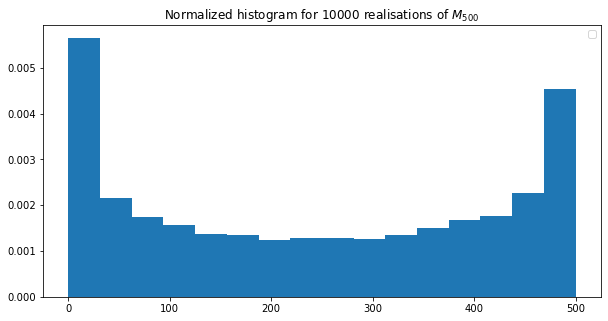

In [13]:
# COMPLETE/MODIFY THE PLOT COMMANDS ACCORDINGLY

N = 250
M = 10000

c= sampleMaxTime(N,M)
# This has to be replaced by the simulated values for M_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $M_{500}$")
plt.hist(c, bins='auto', density='True')
plt.legend()
plt.show()

## Problem 4 (4 points)

This problem deals with simulating a Brownian motion (see e.g., https://en.wikipedia.org/wiki/Wiener_process), which is a fundamental object in statistics, physics, probability, and mathematical finance. 

A Brownian motion $\{W_t\}_{0 \leq t \leq T}$, also called a Wiener process, is a very unusual thing! It is a <b>random function</b> from $[0,T]$ to $\mathbb{R}$ that has the properties listed below:

* $W_0$ = 0; the process starts at 0.
* It is a continuous function of $t$ on the interval $[0,T]$ (in this problem we consider $T = 1$, but the general case is similar).
* The increments of $\{W_t\}$ are Gaussian; for each $t > s > 0$, $W_t - W_s \sim \mathcal{N}(0,t - s)$
* The increments of $\{W_t\}$ are independent; for each $u \geq 0$ and all $t > 0$, the random variable $W_{t+u} - W_t$ is independent of $W_s$ for all $s \leq t$.
* With probability 1, $\{W_t\}$ is not differentiable anywhere on the interval $[0,T]$.

In order to simulate a Brownian motion (and to show that such a process exists!), it is helpful to study the behavior of recaled simple random walks. In order to simulate a Brownian motion, we begin by considering a simple symmetric random walk $\{S_n\}_{n=0}^{\infty}$. Recall that we can write
$$
S_n = \sum\limits_{i=1}^n X_i,
$$

where $\{X_i\}_{i=1}^{\infty}$ are i.i.d. random variables such that $\mathbb{P}(X_i = 1) = p = 0.5$ and $\mathbb{P}(X_i = -1) = q = 1-p = 0.5$.

When $p,q \neq 0.5$, we obtain biased random walk, which will lead to a <b>Brownian motion with drift</b>.

It turns out the a Brownian motion can be approximated by increasing the rate at which the random walk jumps in a fixed time period. Accordingly, for each $N \in \mathbb{N}$, we define a continuous-time process $\{S^N_t\}_{0 \leq t \leq 1}$, which describes a random walk that makes $N$ jumps in the time interval $[0,1]$. As the number of jumps $N$ increases, the process $\{S^N_t\}_{0 \leq t \leq 1}$ converges <b>in distribution</b>  to a Brownian motion $\{W_t\}_{0 \leq t \leq 1}$.

<b>Note:</b> we have not discussed exactly what it means for a sequence of functions to converge in distribution to another function. This is beyond the scope of this course, but I am happy to discuss if you are curious. 

For each $N \in \mathbb{N}$, the function $S^N : [0,1] \to \mathbb{R}$ is defined as follows:

$$
S^N(t) = \frac{1}{\sqrt{N}} \left[ S_{\lfloor Nt \rfloor} + (Nt - \lfloor Nt \rfloor) X_{\lfloor Nt \rfloor + 1}\right],
$$

where the function $x \mapsto \lfloor x \rfloor$ outputs the integer part of $x$. For example, $\lfloor 2.5 \rfloor = 2$.



__1.Function:__ <tt>SimulateBM(...)</tt>

Input: 
* <tt>N</tt>: The number of jumps the random walk will undergo in the time interval $[0,1]$

* <tt>p</tt>: The probability that the random walk increases by 1 at each step. 

Output:
* <tt>bmsim</tt>: Realization of the random function $S^N_{t}$ at time instants $t = 0, \frac{1}{N}, \frac{2}{N}, \dots, \frac{N-1}{N}, \frac{N}{N}$. (list of length $N+1$)

<b>Note:</b> this is <b>exactly</b> the same as outputting the values of $S_n$ for $n = 0,1,\dots, N$.

In [14]:
def SimulateBM(N, prob):
    
    ## WRITE YOUR OWN CODE HERE
    result = [0]
    for i in range(0,N):
        result.append(result[i] + np.random.choice([-1,1],p = [prob,1-prob]))
        
    return result 

In [15]:
print(SimulateBM(100,0.5))

[0, -1, 0, 1, 2, 3, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, -1, -2, -3, -4, -3, -2, -3, -4, -3, -2, -1, -2, -3, -2, -3, -4, -5, -6, -5, -4, -3, -4, -3, -2, -3, -2, -3, -2, -1, -2, -3, -4, -5, -4, -3, -4, -5, -6, -5, -6, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -16, -17, -18, -19, -18, -19, -20, -21, -22, -21, -22, -21, -20, -21, -22, -23, -24, -23, -22, -23, -24, -25, -26, -27, -28]


__2. Function:__ <tt>PlotBM(...)</tt>

Input:
* <tt>N</tt>: The number of jumps the random walk will undergo in the time interval $[0,1]$

* <tt>p</tt>: The probability that the random walk increases by 1 at each step. 

Output:
* A plot of $\{S^N_t\}_{0 \leq t \leq 1}$ on the time interval $[0,1]$.

<b>Hint:</b> define the list $t = \left\{0, \frac{1}{N}, \dots, \frac{N-1}{N}, \frac{N}{N}\right\}$ and use the function <tt>plt.plot(t, bmsim1)</tt>,  where <tt>bmsim1</tt> is the output of your function from part 1 with the specified choices of $N$ and $p$. The <tt>plt.plot</tt> function will automatically linearly interpolate between $S^N\left(\frac{0}{N}\right), S^N\left( \frac{1}{N}\right), \dots, S^N\left(\frac{N}{N}\right)$, thereby plotting the process $S^N(t)$ defined above, for all $t \in [0,1]$.


In [16]:
def PlotBM(N, p):
    
    ## WRITE YOUR OWN CODE HERE
    t = np.arange(N+1)/N
    plt.title("plot for N = {0} and p = {1}".format(N,p)) 
    plt.xlabel("t")
    plt.ylabel("$S^N$")
    plt.plot(t, SimulateBM(N,p))

__3.__ Using your function from part __2.__, create plots simulating a Brownian motion for the following choices of $(N,p)$:
$$
(N,p) = (10,0.5), (100,0.5), (10000,.5).
$$

Make the plots several times and observe how different they are each time (the paths are random, after all). Comment on what you observe, then repeat with the same choice of $N$, but different choice of $p = (.55, 0.4, 0.7, 0.2, 0.9)$.



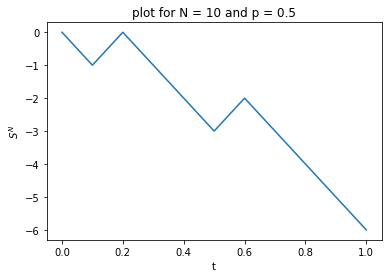

In [17]:
PlotBM(10,0.5)

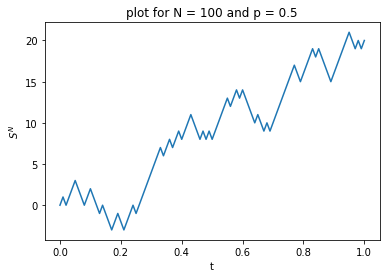

In [18]:
PlotBM(100,0.5)

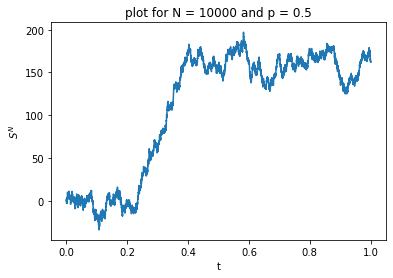

In [19]:
PlotBM(10000,0.5)

In [20]:
# With N increasing, the range of S_N increasing as well

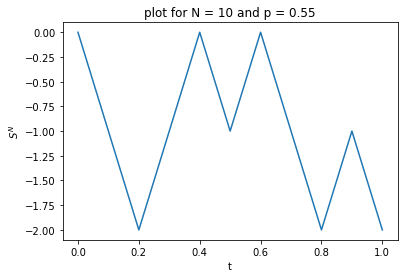

In [21]:
PlotBM(10,0.55)

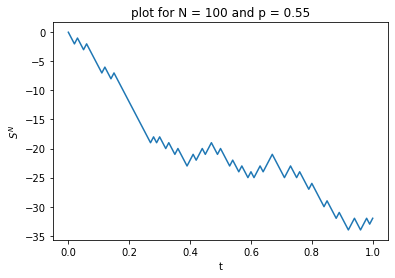

In [22]:
PlotBM(100,0.55)

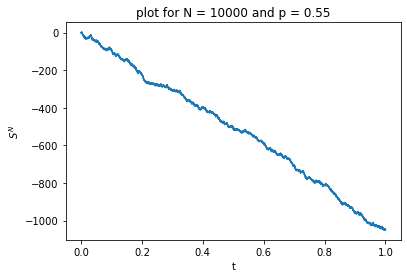

In [23]:
PlotBM(10000,0.55)

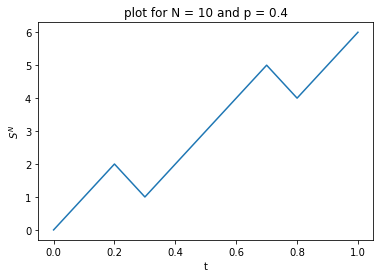

In [24]:
PlotBM(10,0.4)

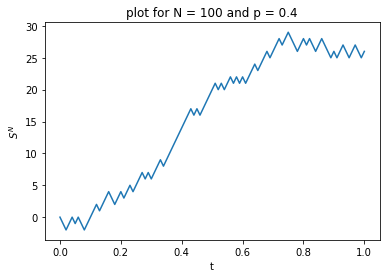

In [25]:
PlotBM(100,0.4)

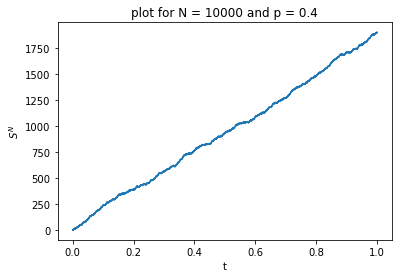

In [26]:
PlotBM(10000,0.4)

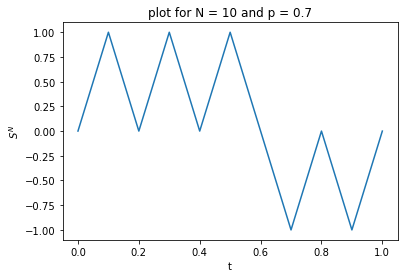

In [27]:
PlotBM(10,0.7)

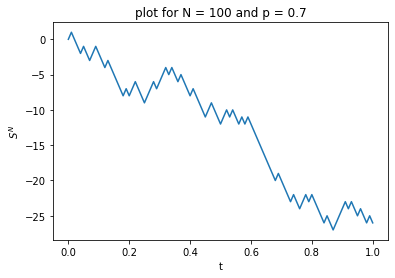

In [28]:
PlotBM(100,0.7)

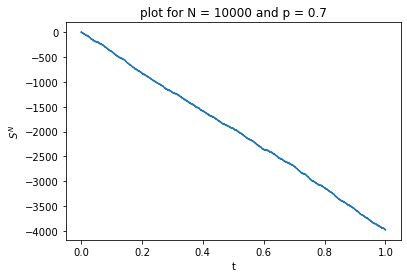

In [29]:
PlotBM(10000,0.7)

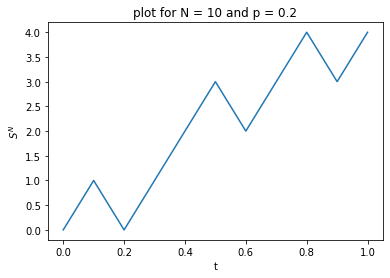

In [30]:
PlotBM(10,0.2)

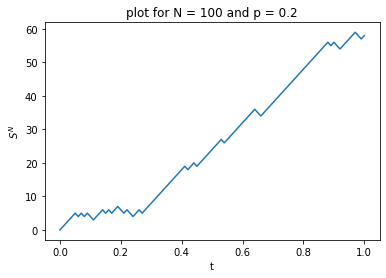

In [31]:
PlotBM(100,0.2)

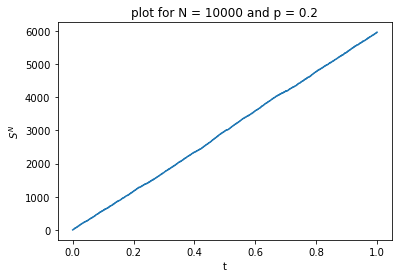

In [32]:
PlotBM(10000,0.2)

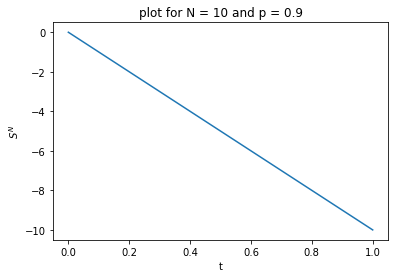

In [33]:
PlotBM(10,0.9)

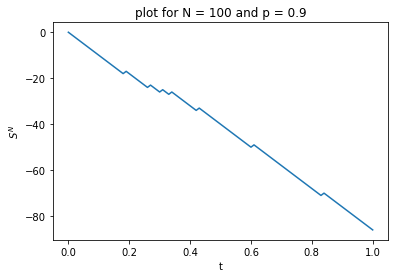

In [34]:
PlotBM(100,0.9)

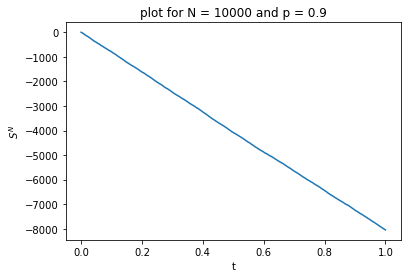

In [35]:
PlotBM(10000,0.9)